In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
root_dir = '/Users/kessapassa/OneDrive/research_log/20190114/'

In [3]:
dir_list = ['people10000', 'people20000', 'people30000']
seed_list = [str(123 + i) for i in range(3)]
csv_list = ['census', 'mobile']
times_list = [str(3600 * (i + 1)) for i in range(6)]
area_one_length = 9

In [4]:
def create_base_dataframe():
    df = pd.DataFrame(columns=(['{0:02d}'.format(i*10) for i in range(area_one_length)]))
    return df

In [5]:
create_base_dataframe()

,00,10,20,30,40,50,60,70,80


In [6]:
# エリア番号を線形的な数から、iとjで回した数のようにする
def convert_area_to_contour(base, read):
    for r in np.asanyarray(read):
        area_id = int(r[1])
        row = str(area_id // area_one_length)
        col = str(area_id % area_one_length) + '0'
        base.loc[row, col] = r[2]
        
    return base

In [7]:
# csv_array = {}
# for _dir in ['people30000']:
#     csv_array[_dir] = {}
#     for _seed in ['123']:
#         csv_array[_dir][_seed] = {}
#         for _csv in csv_list:
#             csv_array[_dir][_seed][_csv] = {}
#             df = pd.read_csv(root_dir + '2D/' + _dir + 'seed' + _seed + '_' + _csv + '.csv',
#                                                     encoding='Shift_JISx0213')
#             plt.plot(df['people'])

In [8]:
base = create_base_dataframe()

csv_array = {}
for _dir in dir_list:
    csv_array[_dir] = {}
    for _seed in seed_list:
        csv_array[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array[_dir][_seed][_csv] = {}
            df = pd.read_csv(root_dir + '2D/' + _dir + 'seed' + _seed + '_' + _csv + '.csv',
                                                    encoding='Shift_JISx0213')
            df['time'] = df['time'].apply(lambda x: str(int(x)))
            
            group_list = df.groupby(['time'], sort=False)
            for _times, _group in group_list:
                df = convert_area_to_contour(base.copy(), _group.copy())
                df = df.sort_index(ascending=False)
                csv_array[_dir][_seed][_csv][_times] = df

In [9]:
def create_contour(df, file_name=False):
    plt.figure(figsize=(9,6))
    if file_name:
        plt.figure(figsize=(9,6), dpi=600)
        
    sns.heatmap(df, annot=True, fmt='.0f', cmap='RdYlGn_r',
               vmax=df.sum().mean(), vmin=0)
    if file_name:
        plt.savefig('{0}.png'.format(file_name))

In [10]:
people = 'people30000'
seed = '123'
csv = 'census'

# コンター図

3600


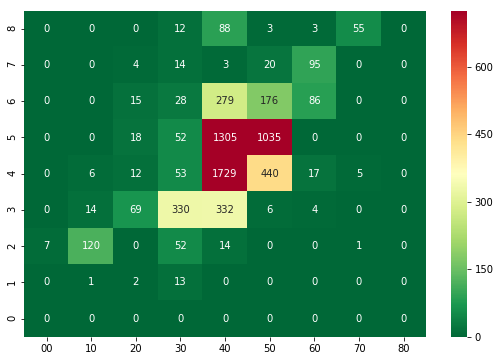

In [11]:
time = times_list[0]
print(time)
create_contour(csv_array[people][seed][csv][time])

7200


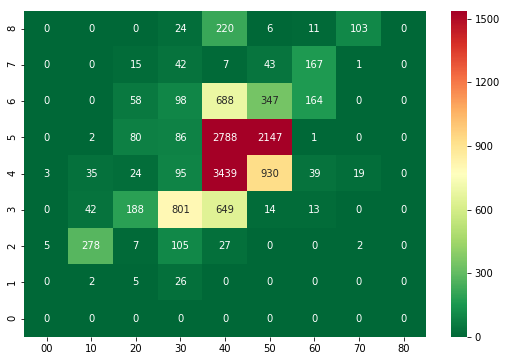

In [12]:
time = times_list[1]
print(time)
create_contour(csv_array[people][seed][csv][time])

10800


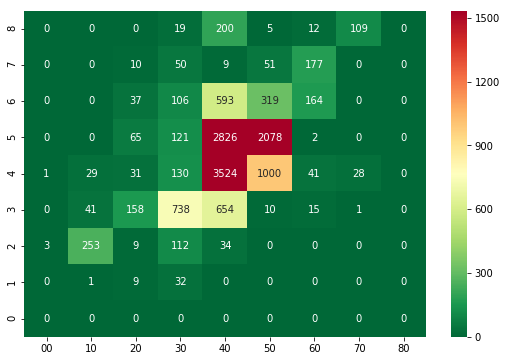

In [13]:
time = times_list[2]
print(time)
create_contour(csv_array[people][seed][csv][time])

14400


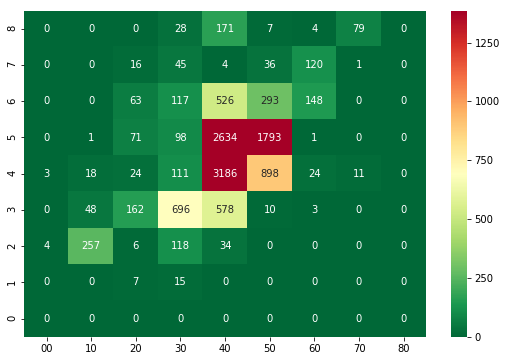

In [14]:
time = times_list[3]
print(time)
create_contour(csv_array[people][seed][csv][time])

18000


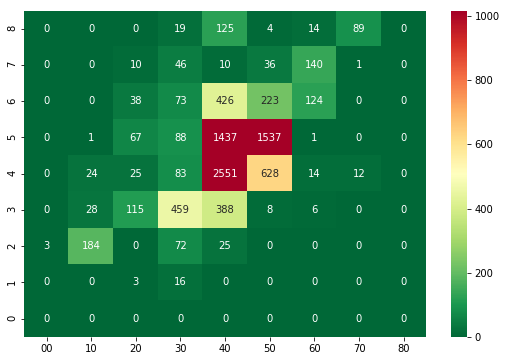

In [15]:
time = times_list[4]
print(time)
create_contour(csv_array[people][seed][csv][time])

21600


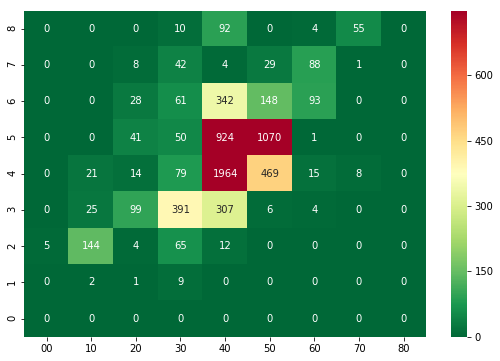

In [16]:
time = times_list[5]
print(time)
create_contour(csv_array[people][seed][csv][time])

24856.0


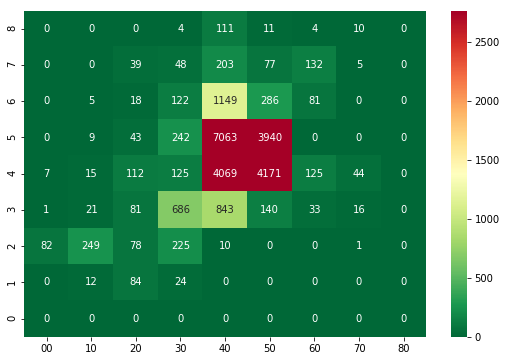

In [110]:
people = 'people30000'
seed = '123'
csv = 'mobile'
df_new = csv_array[people][seed][csv]['3600'].copy()
for _times in times_list:
    if _times != '3600':
        df_new += csv_array[people][seed][csv][_times].copy()
#     print(csv_array[people][seed][csv][_times].sum().sum())
# df_new -= csv_array[people][seed][csv]['3600'].copy()
print(df_new.sum().sum())
create_contour(df_new)
# create_contour(df_new, '{0}seed{1}_{2}'.format(people, seed, csv))

In [18]:
for _dir in dir_list:
    for _seed in seed_list:
        for _csv in csv_list:
            sum_array = 0
            for _times in times_list:
                df = csv_array[_dir][_seed][_csv][_times].copy()
#                 print(df.sum().sum())
                sum_array += df.sum().sum()
            print(_dir, _seed, _csv)
            print(sum_array)

people10000 123 census
20630.0
people10000 123 mobile
8173.0
people10000 124 census
20631.0
people10000 124 mobile
7964.0
people10000 125 census
20410.0
people10000 125 mobile
7958.0
people20000 123 census
41539.0
people20000 123 mobile
17013.0
people20000 124 census
41104.0
people20000 124 mobile
17260.0
people20000 125 census
41322.0
people20000 125 mobile
16869.0
people30000 123 census
62528.0
people30000 123 mobile
24856.0
people30000 124 census
58477.0
people30000 124 mobile
26558.0
people30000 125 census
59909.0
people30000 125 mobile
26006.0


# 各エリアの人数 / 全体人数 = 割合

In [19]:
csv_array_percent = {}
for _dir in dir_list:
    csv_array_percent[_dir] = {}
    for _seed in seed_list:
        csv_array_percent[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array_percent[_dir][_seed][_csv] = {}
            for _times in times_list:
                df = csv_array[_dir][_seed][_csv][_times].copy()
                df /= df.sum().sum()
                csv_array_percent[_dir][_seed][_csv][_times] = df

In [20]:
def create_contour_percent(df):
    plt.figure(figsize=(9,6))
    sns.heatmap(df, annot=True, fmt='.4f', cmap='RdYlGn_r',
               vmax=df.sum().mean(), vmin=0)

3600


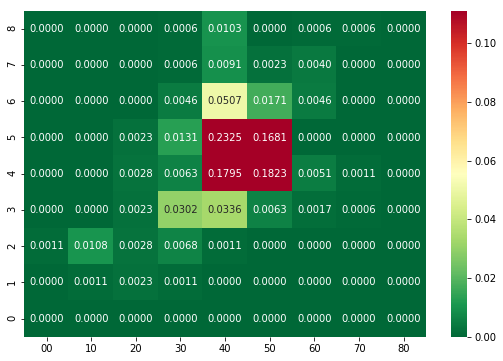

In [21]:
time = times_list[0]
print(time)
create_contour_percent(csv_array_percent[people][seed][csv][time])

7200


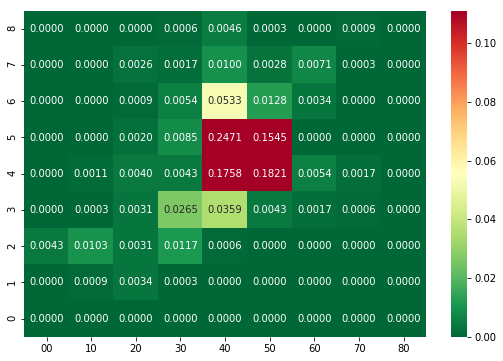

In [22]:
time = times_list[1]
print(time)
create_contour_percent(csv_array_percent[people][seed][csv][time])

10800


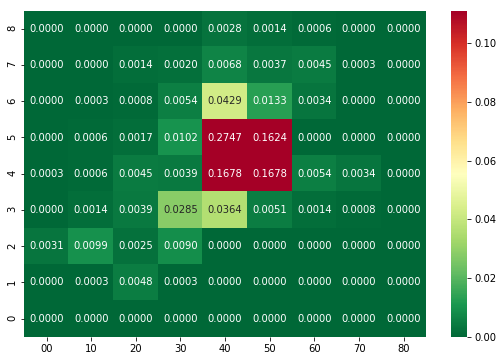

In [23]:
time = times_list[2]
print(time)
create_contour_percent(csv_array_percent[people][seed][csv][time])

14400


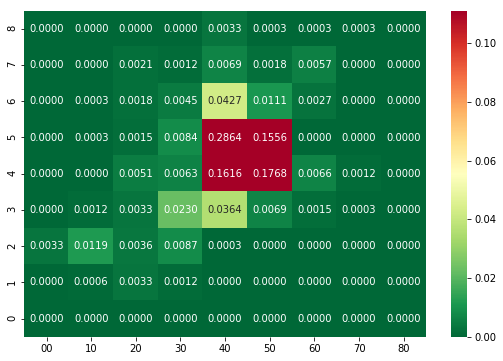

In [24]:
time = times_list[3]
print(time)
create_contour_percent(csv_array_percent[people][seed][csv][time])

18000


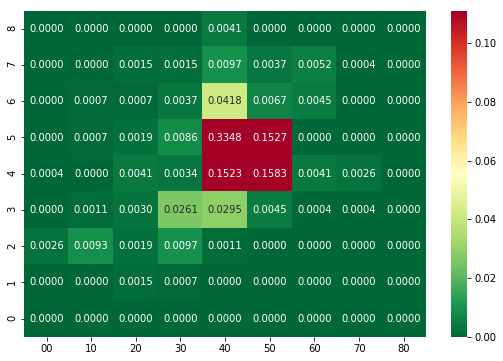

In [25]:
time = times_list[4]
print(time)
create_contour_percent(csv_array_percent[people][seed][csv][time])

21600


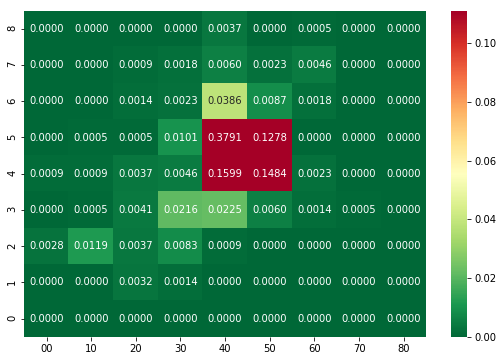

In [26]:
time = times_list[5]
print(time)
create_contour_percent(csv_array_percent[people][seed][csv][time])

# 1時間前とのpercentのdiff

In [27]:
csv_array_diff = {}
for _dir in dir_list:
    csv_array_diff[_dir] = {}
    for _seed in seed_list:
        csv_array_diff[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array_diff[_dir][_seed][_csv] = {}
            for index, _times in enumerate(times_list):
                df = csv_array_percent[_dir][_seed][_csv][_times].copy()
                if _times != times_list[0]:
                    df_diff = csv_array_percent[_dir][_seed][_csv][times_list[index-1]]
                    df /= df_diff
                    df = df.replace(np.inf,np.nan).fillna(0)
                csv_array_diff[_dir][_seed][_csv][_times] = df
#                 df.to_csv(root_dir + 'next_move_area_mobile_census/' + _dir + 'seed' + _seed + '_' + _csv + _times + '.csv')

In [28]:
def create_contour_diff(df):
    plt.figure(figsize=(9,6))
    sns.heatmap(df, annot=True, fmt='.4f', cmap='RdYlGn_r',
               vmax=1.5, vmin=0.5)

3600


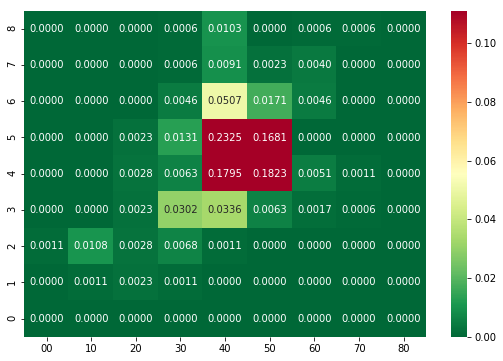

In [29]:
time = times_list[0]
print(time)
create_contour_percent(csv_array_diff[people][seed][csv][time])

7200


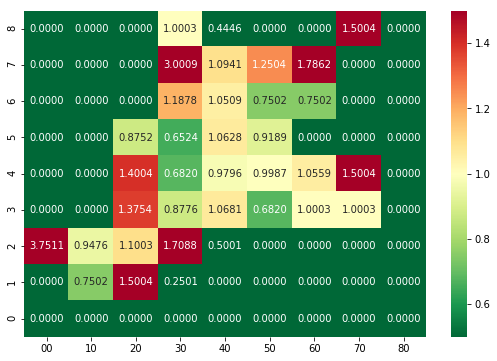

In [30]:
time = times_list[1]
print(time)
create_contour_diff(csv_array_diff[people][seed][csv][time])

10800


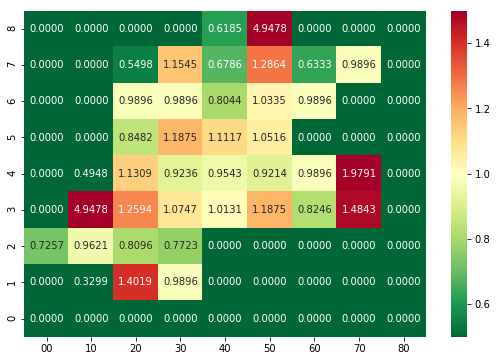

In [31]:
time = times_list[2]
print(time)
create_contour_diff(csv_array_diff[people][seed][csv][time])

14400


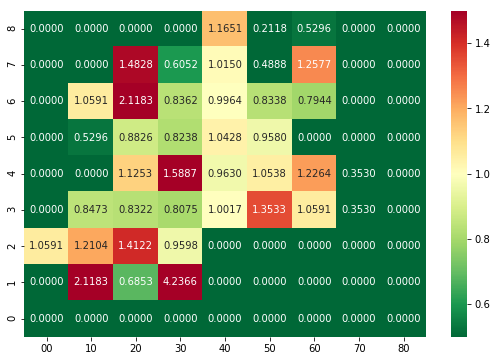

In [32]:
time = times_list[3]
print(time)
create_contour_diff(csv_array_diff[people][seed][csv][time])

18000


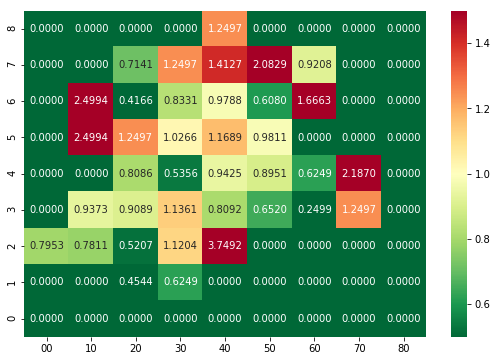

In [33]:
time = times_list[4]
print(time)
create_contour_diff(csv_array_diff[people][seed][csv][time])

21600


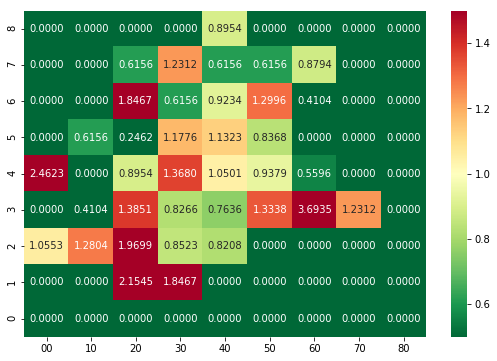

In [34]:
time = times_list[5]
print(time)
create_contour_diff(csv_array_diff[people][seed][csv][time])

# diff * nomal

In [102]:
def create_corrected(time_number):
    time = times_list[time_number]
    print(time)
    
    mobile = csv_array[people][seed]['mobile'][times_list[time_number-1]]
    census = csv_array_diff[people][seed]['census'][time]
    print(census.sum().sum())
    corrected = census * mobile
    create_contour(corrected)
    print('補正値合計:   ',corrected.sum().sum())
    print('ノーマル合計: ',csv_array[people][seed]['mobile'][time].sum().sum())

In [90]:
def cul_corrected(time_number):
    time = times_list[time_number]
    
    mobile = csv_array[people][seed]['mobile'][times_list[time_number-1]]
    census = csv_array_diff[people][seed]['census'][time]
    corrected = census * mobile
    corrected = corrected.astype(int)
    
    return corrected

In [104]:
time_number = 2
time = times_list[time_number]
time_next = times_list[time_number+1]

mobile_array = []
mobile_array.append(csv_array[people][seed]['mobile'][time].copy().astype(int))
mobile_array.append(cul_corrected(time_number))
mobile_array.append(csv_array[people][seed]['mobile'][time_next].copy().astype(int))

7200
45.57536899627664
補正値合計:    1797.7532198560357
ノーマル合計:  3509.0


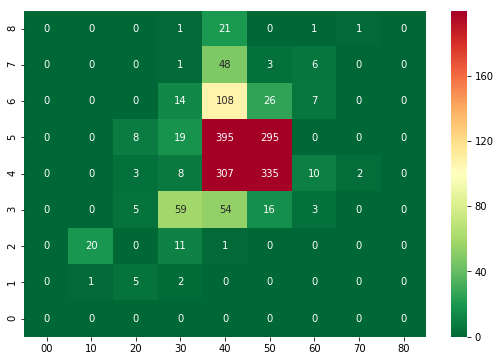

In [103]:
create_corrected(1)

10800
47.2050940101379
補正値合計:    3515.592177921435
ノーマル合計:  3546.0


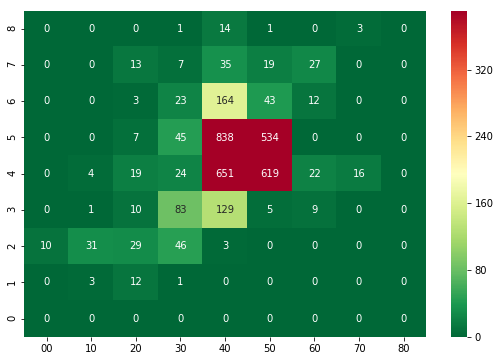

In [65]:
create_corrected(2)

14400
39.84087668999051
補正値合計:    3575.004233583355
ノーマル合計:  3348.0


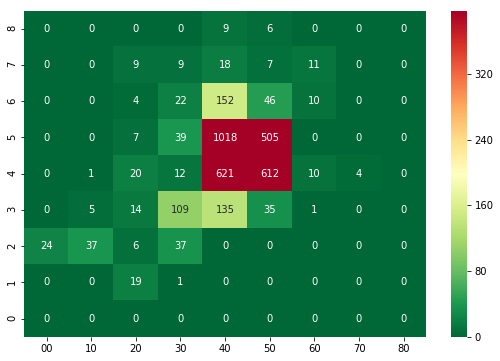

In [66]:
create_corrected(3)

18000
59.87893248049599
補正値合計:    3380.110777274036
ノーマル合計:  2679.0


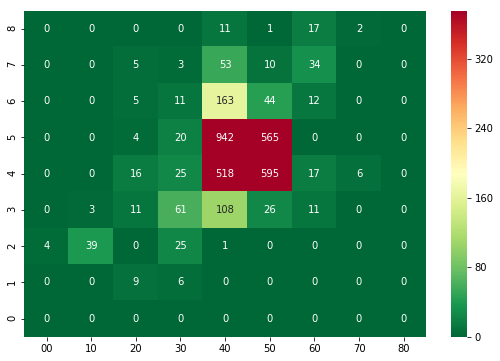

In [67]:
create_corrected(4)

21600
39.703822052822794
補正値合計:    2631.47993449731
ノーマル合計:  2176.0


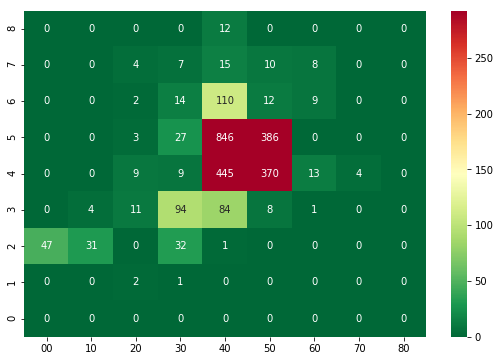

In [68]:
create_corrected(5)

# percent * normal

In [41]:
def create_corrected(time_number):
    time = times_list[time_number]
    print(time)
    print(csv_array_percent[people][seed]['census'][time].sum().sum())
    corrected = csv_array_percent[people][seed]['census'][time] * csv_array[people][seed]['mobile'][time]
    create_contour(corrected)
    print('補正値合計:   ',corrected.sum().sum())
    print('ノーマル合計: ',csv_array[people][seed]['mobile'][time].sum().sum())

7200
1.0
補正値合計:    477.49578527063
ノーマル合計:  3509.0


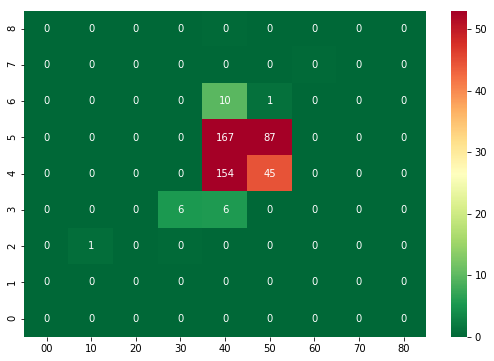

In [42]:
create_corrected(1)

10800
1.0
補正値合計:    491.53047229288796
ノーマル合計:  3546.0


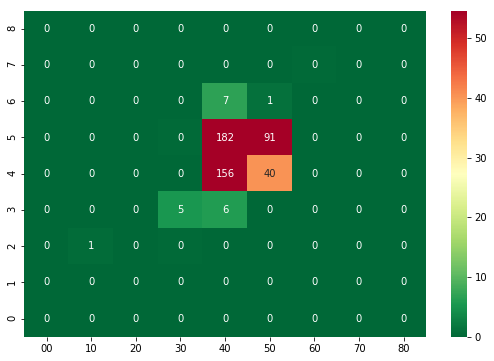

In [43]:
create_corrected(2)

14400
1.0
補正値合計:    469.03055214723935
ノーマル合計:  3348.0


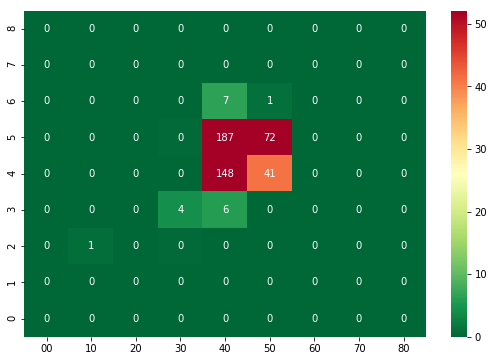

In [44]:
create_corrected(3)

18000
1.0
補正値合計:    384.7909822866344
ノーマル合計:  2679.0


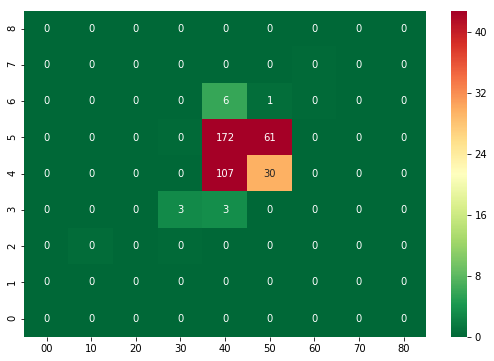

In [45]:
create_corrected(4)

21600
1.0
補正値合計:    319.3170731707317
ノーマル合計:  2176.0


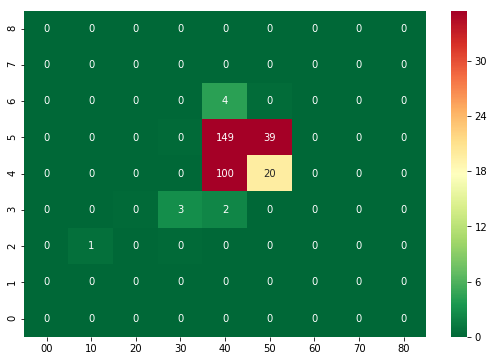

In [46]:
create_corrected(5)